In [1]:
import pandas as pd

wine = pd.read_csv('/Users/fatehkaran/datasets/winequality-white.csv', sep=';')

In [2]:
wine.loc[(wine.quality <= 5),'quality']= 0
wine.loc[(wine.quality > 5),'quality']= 1

In [3]:
wine["quality"].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [5]:
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.383280
pH                      0.083687
sulphates               0.051858
citric acid            -0.000700
free sulfur dioxide    -0.001278
fixed acidity          -0.089749
residual sugar         -0.092756
total sulfur dioxide   -0.170924
chlorides              -0.183939
volatile acidity       -0.225440
density                -0.268696
Name: quality, dtype: float64

In [6]:
allData = wine

X = wine[['chlorides', 'total sulfur dioxide']]

target = wine['quality']

y = target.astype(np.int)

X = X.values
y = y.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [8]:
%%time
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 
              'tol': [1e-3, 1e-4], 'max_iter':[3000, 5000, 10000],'C': [0.001, 0.1, 0.5, 1, 10]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   27.1s


Best Score (accuracy): 0.674834
Optimal Hyperparameter Values:  {'C': 10, 'max_iter': 3000, 'solver': 'liblinear', 'tol': 0.0001}


CPU times: user 986 ms, sys: 170 ms, total: 1.16 s
Wall time: 1min 46s


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.8min finished


In [9]:
lg_reg_clf = LogisticRegression(**params_optimal)

lg_reg_clf.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=3000, solver='liblinear')

In [10]:
print("No. of Iterations:", lg_reg_clf.n_iter_ )
print("\nWeight Intercept:", lg_reg_clf.intercept_ )
print("Weight Coefficients:", lg_reg_clf.coef_ )

No. of Iterations: [16]

Weight Intercept: [2.30593564]
Weight Coefficients: [[-1.08930725e+01 -7.79992135e-03]]


In [11]:
y_test_predicted = lg_reg_clf.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.6612244897959184

Test Confusion Matrix:
[[ 25 317]
 [ 15 623]]

Test Precision = 0.662766
Test Recall = 0.976489
Test F1 Score = 0.789607

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.07      0.13       342
           1       0.66      0.98      0.79       638

    accuracy                           0.66       980
   macro avg       0.64      0.52      0.46       980
weighted avg       0.65      0.66      0.56       980



In [12]:
def decision_boundary_equation_based(clf, X):
    
    xmin, xmax = X.min() - 1, X.max() + 1
    
    w = clf.coef_[0] # We use index 0 to return a list from a 1 x 2 coef_ matrix
    b = clf.intercept_[0]  

    x1 = np.linspace(xmin, xmax, 100)
    decision_boundary = -(b + w[0]*x1)/w[1]
    plt.plot(x1, decision_boundary, "k--", linewidth=3)

In [13]:
print(wine['chlorides'].max())
print(wine['chlorides'].min())
print(wine['total sulfur dioxide'].max())
print(wine['total sulfur dioxide'].min())

0.34600000000000003
0.009000000000000001
440.0
9.0


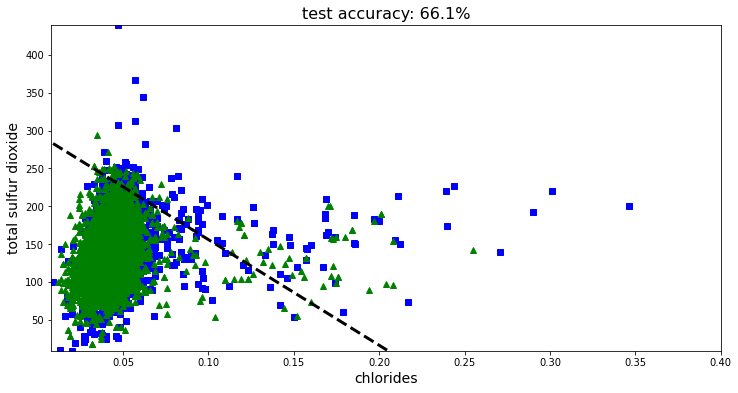

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

decision_boundary_equation_based(lg_reg_clf, X)

plt.xlabel("chlorides", fontsize=14)
plt.ylabel("total sulfur dioxide", fontsize=14)
plt.title("test accuracy: 66.1%", fontsize=16)
plt.axis([0.008, 0.4, 9, 440])
plt.show()